In [1]:
import discretisedfield as df
import numpy as np
import mag2exp

In `mag2exp` the experimental SANS reference frame is the same as that defined to be congruent with the sample reference frame. The neutron polarisation direction can then be defined relative to the sample reference frame along with the desired scattering plane.

<img src="Figures/SANS.png" width="900" height="600">

In [20]:
m_arr = np.load('Sk_Lattice.npy')

In [21]:
m_arr.shape

(250, 250, 25, 3)

In [22]:
mesh = df.Mesh(p1=(-5e-07, -5e-07, -5e-08), p2 = (5e-07, 5e-07, 5e-08), n=m_arr.shape[0:3])

In [24]:
m_field = df.Field(mesh=mesh, dim=3, value=m_arr)

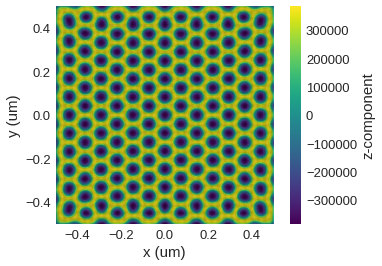

In [25]:
m_field.plane('z').mpl()

In [44]:
cs = mag2exp.sans.cross_section(m_field, method='pn', polarisation=(1, 0, 1))

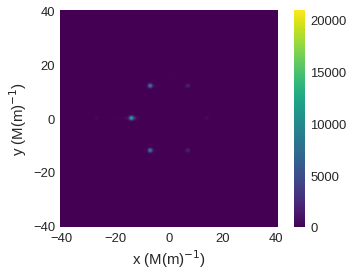

In [45]:
sans_region = df.Region(p1=(-40e6, -40e6, 0), p2=(40e6, 40e6, 0.5))
cs[sans_region].plane(z=0).mpl.scalar(interpolation='gaussian')

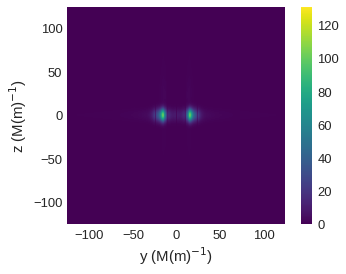

In [46]:
cs.plane(x=0).mpl.scalar(interpolation='gaussian')

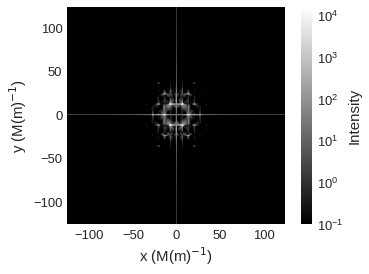

In [35]:
import matplotlib.colors as colors

cs.plane(z=0).mpl.scalar(
    cmap="gray",
    colorbar_label=r"Intensity",
    norm=colors.LogNorm(vmin=1e-1, vmax=cs.real.array.max()),
)